In [62]:
#Conditional Graph , use the start and end node to manage entry and exit 

from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [63]:
class AgentState(TypedDict):
    num1 : int
    num2 : int
    operation : str
    result : int

In [64]:
def adder(state: AgentState)->AgentState:
    """This node adds 2 numbers"""
    state['result'] = state['num1']+state['num2']

    return state

def subber(state: AgentState)->AgentState:
    """This node subtracts 2 numbers"""
    state['result'] = state['num1']-state['num2']

    return state

def decide_next_node(state: AgentState)-> AgentState:
    """This node is used to decide the next node based on the operation"""
    if state['operation'] == '+':
        return "addition_operation" #we return the edge to decide which node to go to next
    
    if state['operation'] == '-':
        return "subtraction_operation" #we return the edge to decide which node to go to next

In [65]:
graph = StateGraph(AgentState)

graph.add_node("adder_node",adder)
graph.add_node("subber_node",subber)
graph.add_node("decide_next_node",lambda state:state) #this passes an input state and then the output is also the exact same state

graph.add_edge(START,"decide_next_node")
graph.add_conditional_edges(
    "decide_next_node", #this is the starting node 
    decide_next_node, #This is the fucntion which has the logic working on the node 
    {
        #Edge: Node
        "addition_operation" : "adder_node", #this is the path 
        "subtraction_operation" : "subber_node"
    }
)

graph.add_edge("adder_node",END)
graph.add_edge("subber_node",END)
app=graph.compile()

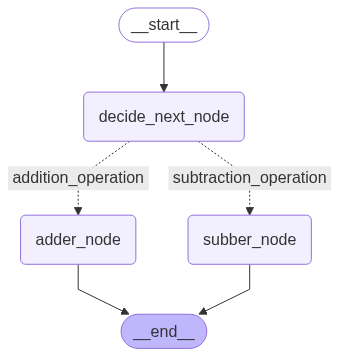

In [66]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [67]:
ans=app.invoke({'num1':1,'num2':3,'operation':'+'})
print(ans)
print(ans['result'])

{'num1': 1, 'num2': 3, 'operation': '+', 'result': 4}
4


Exercise: 
Input: initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)


In [68]:
class AgentMathNode(TypedDict):
    num1:int
    num2:int
    num3:int
    num4:int
    final1:int
    final2:int
    operation1: str
    operation2: str



In [69]:
def add1(state: AgentMathNode)->AgentMathNode:
    """Addition node 1"""
    state['final1'] = state['num1']+state['num2']
    return state

def add2(state: AgentMathNode)->AgentMathNode:
    """Addition node 2"""
    state['final2'] = state['num3']+state['num4']
    return state

def sub1(state: AgentMathNode)->AgentMathNode:
    """Subtraciton node 1"""
    state['final1'] = state['num1']-state['num2']
    return state

def sub2(state: AgentMathNode)->AgentMathNode:
    """Subtraciton node 2"""
    state['final2'] = state['num3']-state['num4']
    return state

def route1(state: AgentMathNode)->AgentMathNode:
    if state['operation1'] == "+":
        return "addition_edge_1"
    if state['operation1'] == "-":
        return "subtraction_edge_1"
    
def route2(state: AgentMathNode)->AgentMathNode:
    if state['operation2'] == "+":
        return "addition_edge_2"
    if state['operation2'] == "-":
        return "subtraction_edge_2"

In [70]:
graph=StateGraph(AgentMathNode)

graph.add_node("add_node_1",add1)
graph.add_node("add_node_2",add2)
graph.add_node("sub_node_1",sub1)
graph.add_node("sub_node_2",sub2)
graph.add_node("decide_node_1",lambda state:state)
graph.add_node("decide_node_2",lambda state:state)
graph.add_edge(START,"decide_node_1")

graph.add_conditional_edges(
    "decide_node_1",
    route1,
    {
        "addition_edge_1":"add_node_1",
        "subtraction_edge_1":"sub_node_1"
    }
)

graph.add_edge("add_node_1","decide_node_2")
graph.add_edge("sub_node_1","decide_node_2")

graph.add_conditional_edges(
    "decide_node_2",
    route2,
    {
        "addition_edge_2":"add_node_2",
        "subtraction_edge_2":"sub_node_2"
    }
)


graph.add_edge("add_node_2",END)
graph.add_edge("sub_node_2",END)


app=graph.compile()

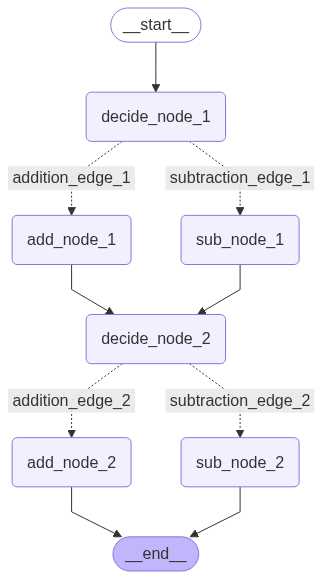

In [71]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [73]:
ans1=app.invoke({'num1':1,'num2':2,'num3':3,'num4':4,'operation1':'+','operation2':'+'})
ans2=app.invoke({'num1':1,'num2':2,'num3':3,'num4':4,'operation1':'+','operation2':'-'})
ans3=app.invoke({'num1':1,'num2':2,'num3':3,'num4':4,'operation1':'-','operation2':'+'})
ans4=app.invoke({'num1':1,'num2':2,'num3':3,'num4':4,'operation1':'-','operation2':'-'})
print(ans1)
print(ans2)
print(ans3)
print(ans4)

{'num1': 1, 'num2': 2, 'num3': 3, 'num4': 4, 'final1': 3, 'final2': 7, 'operation1': '+', 'operation2': '+'}
{'num1': 1, 'num2': 2, 'num3': 3, 'num4': 4, 'final1': 3, 'final2': -1, 'operation1': '+', 'operation2': '-'}
{'num1': 1, 'num2': 2, 'num3': 3, 'num4': 4, 'final1': -1, 'final2': 7, 'operation1': '-', 'operation2': '+'}
{'num1': 1, 'num2': 2, 'num3': 3, 'num4': 4, 'final1': -1, 'final2': -1, 'operation1': '-', 'operation2': '-'}
